<a href="https://colab.research.google.com/github/EAName/yelp-reviews/blob/main/Yelp_Combined_Reviews_(no_business_attributes)_DNN_RA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Packages

In [1]:
from packaging import version

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization


import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statistics

%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, silhouette_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

from sklearn.model_selection import train_test_split

from datetime import datetime


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Load Business Dataset

In [3]:
df_stlouis =pd.read_csv('/content/gdrive/MyDrive/Data/business_df_stlouis.csv')

In [4]:
df_stlouis.shape

(3181, 69)

In [5]:
df_stlouis.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Chicken Wings,Sports Bars,JapaneseTotal,HasTV_NA,RestaurantsPriceRange2_NA,RestaurantsReservations_NA,garage_NA,validated_NA,lot_NA,valet_NA
0,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123.0,38.565165,-90.321087,3.0,19,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ljxNT9p0y7YMPx0fcNBGig,Tony's Restaurant & 3rd Street Cafe,312 Piasa St,Alton,IL,62002.0,38.896563,-90.186203,3.0,94,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1MeIwdbTnZOBFCKOrgaxuw,Ricardo's Italian Cafe,1931 Park Ave,Saint Louis,MO,63104.0,38.617272,-90.212784,3.5,80,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,VrGxoSNZfSiT-G4OqRRGIw,Sunset 44 Bistro,118 W Adams Ave,Saint Louis,MO,63122.0,38.583223,-90.407187,4.0,73,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,wjyUxHxkrvUvCOVqy4g_wg,Oscar's Cafe,7520 Natural Bridge Rd,Normandy,MO,63121.0,38.704765,-90.299811,4.0,11,...,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## Load Reviews Datasets

In [6]:
df =pd.read_csv('/content/gdrive/MyDrive/Data/yelp_reviews_clean_version4_st_louis.csv')

In [7]:
df = df.groupby(['business_id'])['text'].apply(lambda x: ','.join(x)).reset_index()

In [8]:
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [9]:
def clean_doc(doc): 
    #split review into individual words
    tokens=doc.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]

    #word lemmzatization    
    lemm = WordNetLemmatizer()
    tokens=[lemm.lemmatize(word) for word in tokens]

    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 3]
    #lowercase all words
    tokens = [word.lower() for word in tokens]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]     

    # filter out common words
    tokens = [w for w in tokens if not w in ['louis', 'restaurant', 'also', 'youre']] 
    # # word stemming    
    # ps=PorterStemmer()
    # tokens=[ps.stem(word) for word in tokens]

    return tokens

def final_processed_text(doc):
    #this is a function to join the processed text back
    ' '.join(doc)
    return doc

In [38]:
combined = pd.merge(df, df_stlouis, on ='business_id')

In [39]:
combined.head(2)

business_id  \
0  -1wnOZFsvsJPEXh_hWcmMA   
1  -2gmbMDzKgYZ_8DOnJtPyw   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [40]:
combined.shape

(3181, 70)

In [41]:
combined['stars'] = combined['stars'].replace([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], [1, 2, 3, 4, 5, 6, 7, 8, 9])
combined['stars'] = combined['stars'].astype(int)

In [42]:
train, test = train_test_split(combined, test_size=0.3, random_state = 42)

In [43]:
test, val = train_test_split(test, test_size=0.5, random_state = 42)

In [44]:
df2 = train
labels = df2.pop('stars')
df2 = df2.iloc[:,1]
train_ds = tf.data.Dataset.from_tensor_slices((df2, labels))
train_ds = train_ds.batch(32)

In [45]:
df2 = test
labels = df2.pop('stars')
df2 = df2.iloc[:,1]
test_ds = tf.data.Dataset.from_tensor_slices((df2, labels))
test_ds = test_ds.batch(32)

In [46]:
df2 = val
labels = df2.pop('stars')
df2 = df2.iloc[:,1]
val_ds = tf.data.Dataset.from_tensor_slices((df2, labels))
val_ds = val_ds.batch(32)

## Display The Number of Batches

In [47]:
len(train_ds), len(val_ds), len(test_ds)

(70, 15, 15)

In [48]:
len(train), len(val), len(test)

(2226, 478, 477)

## Displaying The Shapes and Dtypes of the First Batch

In [49]:
for inputs, targets in train_ds:
    print("inputs.shape:", inputs.shape)
    print()
    print("inputs.dtype:", inputs.dtype)
    print()
    print("targets.shape:", targets.shape)
    print()
    print("targets.dtype:", targets.dtype)
    print()
    print("inputs[0]:", inputs[0])
    print()
    print("targets[0]:", targets[0])
    break

inputs.shape: (32,)

inputs.dtype: <dtype: 'string'>

targets.shape: (32,)

targets.dtype: <dtype: 'int64'>

inputs[0]: tf.Tensor(b'BLT and Buffalo chicken grilled cheese were very good. Had chili and the fries as the side and were good as well. Will go back.,I was lucky when a local suggested this gem in this beautiful town. I have enjoyed both my experiences. The food and hospitality was above and beyond.,Stopped in on our way through for a early afternoon lunch. The food was amazing and the staff was extremely nice. It\'s a small cute restaurant on a very unique street with lots of shops and restaurants.,I took a trip out to The Lantern with my sister and her kids after it received rave reviews in a local foodie group she belongs to.\nWe were seated and immediately informed our orders might take a while due to a large party arriving just before us. This is truly a family run operation, with one cook shouldering all of food prep. We appreciated the heads up but settled in with some c

In [50]:
def plot_history(history):
  losses = history.history['loss']
  accs = history.history['accuracy']
  val_losses = history.history['val_loss']
  val_accs = history.history['val_accuracy']
  epochs = len(losses)

  plt.figure(figsize=(16, 4))
  for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
  plt.show()

In [51]:
def print_validation_report(test_labels, predictions):
    print("Classification Report")
    print(classification_report(test_labels, predictions))
    print('Accuracy Score: {:.3f}'.format(accuracy_score(test_labels, predictions)))
    print('Mean Absolute Error: {:.3f}'.format(mean_absolute_error(test_labels, predictions)))
    print('Root Mean Square Error: {:.3f}'.format(np.sqrt(MSE(test_labels, predictions))))
    print('Mean Square Error: {:.3f}'.format(MSE(test_labels, predictions, squared = True)))

In [52]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')
    ax.xaxis.set_ticklabels(['1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5'])
    ax.yaxis.set_ticklabels(['1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5'])

## Preprocessing Datasets TextVectorization Layer

In [53]:
text_vectorization = TextVectorization(
    max_tokens=1000,
    output_mode="count")

In [54]:
text_only_train_ds = train_ds.map(lambda x, y: x)

## Adapt Method - Standardize Text

In [55]:
text_vectorization.adapt(text_only_train_ds)

In [56]:
count_1gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
count_1gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
count_1gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

In [57]:
test_data = [(example.numpy(), label.numpy()) for example, label in count_1gram_test_ds]
test_y = []

for i in range(len(test)//32):
  for j in range(32):
    test_y.append(test_data[i][1][j])

for j in range(len(test)%32):
  test_y.append(test_data[len(test)//32][1][j])

test_y = np.array(test_y)

In [58]:
test_y.size

477

# Count Unigram Model

In [59]:
text_vectorization = TextVectorization(
    ngrams=1,
    max_tokens=1000,
    output_mode="count",
)

In [60]:
text_vectorization.adapt(text_only_train_ds)
count_1gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
count_1gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
count_1gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

## Build Count Unigram Model 

In [71]:
def get_model(max_tokens=1000, hidden_dim=128):
    inputs = tf.keras.Input(shape=(max_tokens,))
    x = layers.Dense(hidden_dim, activation="relu")(inputs)
    x = layers.Dropout(0.2)(x)
  #  x = layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(0.001))(x)
 #   x = layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(0.001))(x)
  #  x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(10, activation="softmax")(x)
    model = tf.keras.Model(inputs, outputs)

    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt,
                  loss='SparseCategoricalCrossentropy',
                  metrics=["accuracy"])
    return model

In [72]:
model_count_Unigram = get_model()
model_count_Unigram.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_6 (Dense)             (None, 128)               128128    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 129,418
Trainable params: 129,418
Non-trainable params: 0
_________________________________________________________________


In [73]:
callbacks = [
     tf.keras.callbacks.ModelCheckpoint("binary_2gram.keras",save_best_only=True)
    ,tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
]

history = model_count_Unigram.fit(count_1gram_train_ds.cache(),
          validation_data=count_1gram_val_ds.cache(),
          epochs=20,
          callbacks=callbacks)
model_count_Unigram = keras.models.load_model("binary_2gram.keras")
print(f"Test acc: {model_count_Unigram.evaluate(count_1gram_test_ds)[1]:.3f}")

Epoch 1/20
70/70 [==============================] - 5s 65ms/step - loss: 35.5959 - accuracy: 0.2336 - val_loss: 10.7133 - val_accuracy: 0.2197
Epoch 2/20
70/70 [==============================] - 0s 3ms/step - loss: 5.1340 - accuracy: 0.3055 - val_loss: 2.6322 - val_accuracy: 0.2490
Epoch 3/20
70/70 [==============================] - 0s 3ms/step - loss: 2.0109 - accuracy: 0.3149 - val_loss: 1.9683 - val_accuracy: 0.3222
Epoch 4/20
70/70 [==============================] - 0s 3ms/step - loss: 1.7836 - accuracy: 0.3787 - val_loss: 1.7263 - val_accuracy: 0.3745
Epoch 5/20
70/70 [==============================] - 0s 3ms/step - loss: 1.6500 - accuracy: 0.3801 - val_loss: 1.6743 - val_accuracy: 0.4038
Epoch 6/20
70/70 [==============================] - 0s 3ms/step - loss: 1.6039 - accuracy: 0.4057 - val_loss: 1.4839 - val_accuracy: 0.4414
Epoch 7/20
70/70 [==============================] - 0s 3ms/step - loss: 1.4888 - accuracy: 0.4313 - val_loss: 1.4889 - val_accuracy: 0.4331
Epoch 8/20
70/70 

In [74]:
model_count_Unigram.evaluate(count_1gram_test_ds)

15/15 [==============================] - 1s 42ms/step - loss: 1.4043 - accuracy: 0.4633


[1.4043138027191162, 0.4633123576641083]

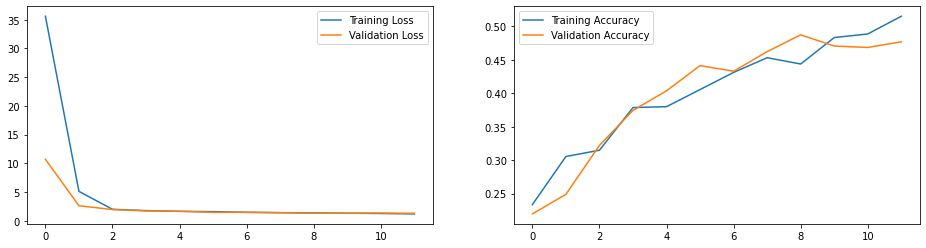

In [75]:
plot_history(history)

In [76]:
pred1= model_count_Unigram.predict(count_1gram_test_ds)
pred1=np.argmax(pred1, axis=1)

15/15 [==============================] - 1s 41ms/step


In [77]:
print_validation_report(test_y, pred1)

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         8
           3       0.43      0.18      0.25        17
           4       0.27      0.08      0.12        39
           5       0.31      0.26      0.28        78
           6       0.43      0.74      0.55       124
           7       0.54      0.50      0.52       130
           8       0.62      0.54      0.58        70
           9       0.00      0.00      0.00         9

    accuracy                           0.46       477
   macro avg       0.29      0.25      0.26       477
weighted avg       0.44      0.46      0.43       477

Accuracy Score: 0.463
Mean Absolute Error: 0.658
Root Mean Square Error: 0.976
Mean Square Error: 0.952


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


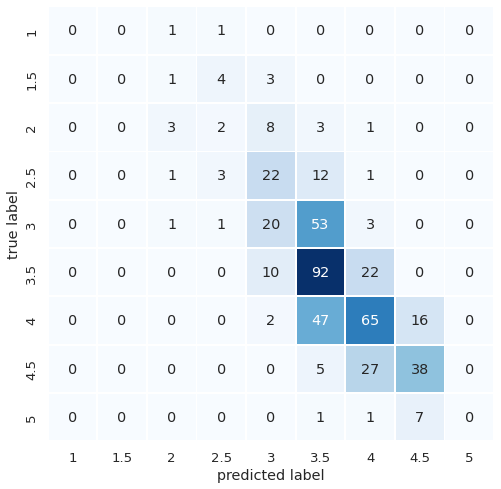

In [78]:
sns.set(font_scale=1.2)
plot_confusion_matrix(test_y,pred1)

## 2 layer model

In [103]:
def get_model(max_tokens=1000, hidden_dim=128):
    inputs = tf.keras.Input(shape=(max_tokens,))
    x = layers.Dense(hidden_dim, activation="relu")(inputs)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(10, activation="softmax")(x)
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer="adam",
                  loss='SparseCategoricalCrossentropy',
                  metrics=["accuracy"])
    return model

In [104]:
model_count_Unigram = get_model()
model_count_Unigram.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_23 (Dense)            (None, 128)               128128    
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               16512     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 10)                1290      
                                                                 
Total params: 145,930
Trainable params: 145,930
Non-trainab

In [105]:
callbacks = [
     tf.keras.callbacks.ModelCheckpoint("binary_2gram.keras",save_best_only=True)
    ,tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
]

model_count_Unigram.fit(count_1gram_train_ds.cache(),
          validation_data=count_1gram_val_ds.cache(),
          epochs=20,
          callbacks=callbacks)
model_count_Unigram = keras.models.load_model("binary_2gram.keras")
print(f"Test acc: {model_count_Unigram.evaluate(count_1gram_test_ds)[1]:.3f}")

Epoch 1/20
70/70 [==============================] - 4s 57ms/step - loss: 21.0795 - accuracy: 0.2296 - val_loss: 2.9979 - val_accuracy: 0.3117
Epoch 2/20
70/70 [==============================] - 0s 4ms/step - loss: 3.0404 - accuracy: 0.2862 - val_loss: 1.9237 - val_accuracy: 0.3285
Epoch 3/20
70/70 [==============================] - 0s 3ms/step - loss: 2.0097 - accuracy: 0.3113 - val_loss: 1.8307 - val_accuracy: 0.3515
Epoch 4/20
70/70 [==============================] - 0s 3ms/step - loss: 1.8691 - accuracy: 0.3297 - val_loss: 1.7392 - val_accuracy: 0.3515
Epoch 5/20
70/70 [==============================] - 0s 4ms/step - loss: 1.7383 - accuracy: 0.3401 - val_loss: 1.5950 - val_accuracy: 0.3933
Epoch 6/20
70/70 [==============================] - 0s 3ms/step - loss: 1.6718 - accuracy: 0.3527 - val_loss: 1.5973 - val_accuracy: 0.3828
Epoch 7/20
70/70 [==============================] - 0s 3ms/step - loss: 1.6087 - accuracy: 0.3477 - val_loss: 1.4772 - val_accuracy: 0.3954
Epoch 8/20
70/70 [

In [106]:
model_count_Unigram.evaluate(count_1gram_test_ds)

15/15 [==============================] - 1s 67ms/step - loss: 1.5172 - accuracy: 0.4277


[1.5171765089035034, 0.42767295241355896]

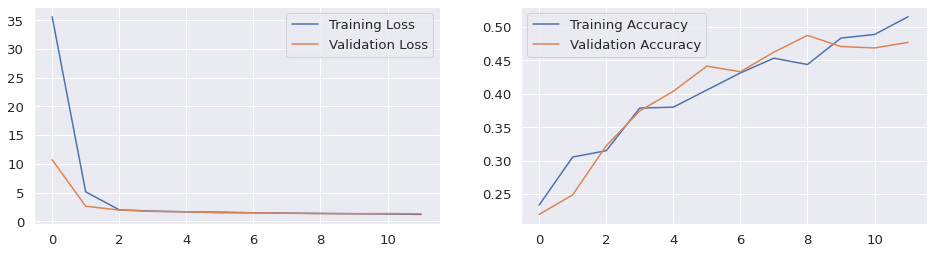

In [107]:
plot_history(history)

In [108]:
pred1= model_count_Unigram.predict(count_1gram_test_ds)
pred1=np.argmax(pred1, axis=1)

15/15 [==============================] - 1s 41ms/step


In [109]:
print_validation_report(test_y, pred1)

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         8
           3       0.54      0.41      0.47        17
           4       0.50      0.08      0.13        39
           5       0.40      0.36      0.38        78
           6       0.39      0.75      0.51       124
           7       0.48      0.36      0.41       130
           8       0.52      0.37      0.43        70
           9       0.00      0.00      0.00         9

    accuracy                           0.43       477
   macro avg       0.31      0.26      0.26       477
weighted avg       0.43      0.43      0.40       477

Accuracy Score: 0.428
Mean Absolute Error: 0.696
Root Mean Square Error: 1.003
Mean Square Error: 1.006


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


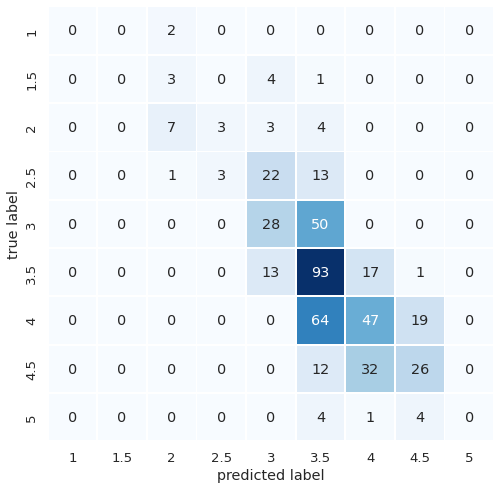

In [110]:
sns.set(font_scale=1.2)
plot_confusion_matrix(test_y,pred1)

# Count Bigram Model

In [111]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=1000,
    output_mode="count",
)

## Build Count Bigram Model 

In [112]:
text_vectorization.adapt(text_only_train_ds)
count_2gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
count_2gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
count_2gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

In [113]:
def get_model(max_tokens=1000, hidden_dim=128):
    inputs = tf.keras.Input(shape=(max_tokens,))
    x = layers.Dense(hidden_dim, activation="relu")(inputs)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(10, activation="softmax")(x)
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer="adam",
                  loss='SparseCategoricalCrossentropy',
                  metrics=["accuracy"])
    return model

In [114]:
model_count_Bigram = get_model()
model_count_Bigram.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_26 (Dense)            (None, 128)               128128    
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 10)                1290      
                                                                 
Total params: 129,418
Trainable params: 129,418
Non-trainable params: 0
_________________________________________________________________


In [116]:
callbacks = [
     tf.keras.callbacks.ModelCheckpoint("binary_2gram.keras",save_best_only=True)
    ,tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
]

history = model_count_Bigram.fit(count_2gram_train_ds.cache(),
          validation_data=count_2gram_val_ds.cache(),
          epochs=20,
          callbacks=callbacks)
model_count_Bigram = keras.models.load_model("binary_2gram.keras")
print(f"Test acc: {model_count_Bigram.evaluate(count_2gram_test_ds)[1]:.3f}")

Epoch 1/20
70/70 [==============================] - 8s 110ms/step - loss: 82.0017 - accuracy: 0.2534 - val_loss: 26.9525 - val_accuracy: 0.1778
Epoch 2/20
70/70 [==============================] - 0s 3ms/step - loss: 18.9955 - accuracy: 0.3396 - val_loss: 2.8448 - val_accuracy: 0.4205
Epoch 3/20
70/70 [==============================] - 0s 3ms/step - loss: 2.2682 - accuracy: 0.3338 - val_loss: 1.9702 - val_accuracy: 0.2803
Epoch 4/20
70/70 [==============================] - 0s 3ms/step - loss: 1.8760 - accuracy: 0.3522 - val_loss: 1.6996 - val_accuracy: 0.4100
Epoch 5/20
70/70 [==============================] - 0s 3ms/step - loss: 1.7016 - accuracy: 0.4052 - val_loss: 1.5288 - val_accuracy: 0.4289
Epoch 6/20
70/70 [==============================] - 0s 3ms/step - loss: 1.6610 - accuracy: 0.4191 - val_loss: 1.7101 - val_accuracy: 0.3326
Epoch 7/20
70/70 [==============================] - 0s 3ms/step - loss: 1.7397 - accuracy: 0.3904 - val_loss: 1.6195 - val_accuracy: 0.4268
Epoch 8/20
15/1

In [117]:
model_count_Bigram.evaluate(count_2gram_test_ds)

15/15 [==============================] - 3s 188ms/step - loss: 1.6715 - accuracy: 0.4151


[1.6715388298034668, 0.4150943458080292]

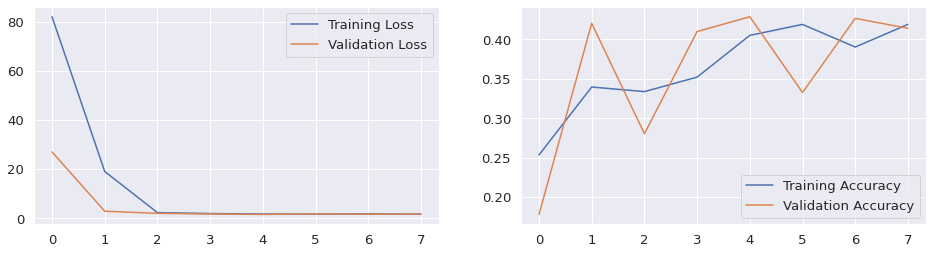

In [118]:
plot_history(history)

In [119]:
pred1= model_count_Bigram.predict(count_2gram_test_ds)
pred1=np.argmax(pred1, axis=1)

15/15 [==============================] - 1s 58ms/step


In [120]:
print_validation_report(test_y, pred1)

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         8
           3       0.45      0.29      0.36        17
           4       0.28      0.13      0.18        39
           5       0.40      0.47      0.43        78
           6       0.38      0.57      0.45       124
           7       0.46      0.29      0.36       130
           8       0.51      0.60      0.55        70
           9       0.00      0.00      0.00         9

    accuracy                           0.42       477
   macro avg       0.27      0.26      0.26       477
weighted avg       0.40      0.42      0.39       477

Accuracy Score: 0.415
Mean Absolute Error: 0.748
Root Mean Square Error: 1.077
Mean Square Error: 1.159


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


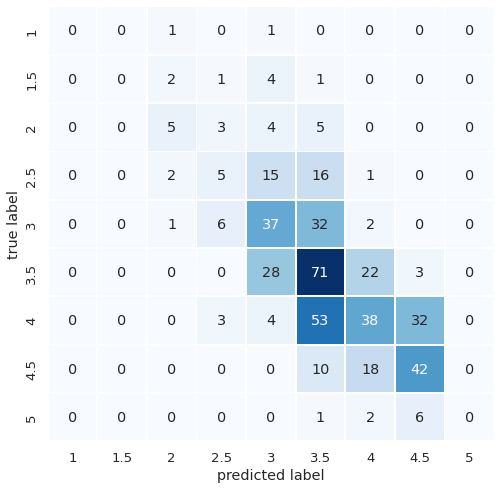

In [121]:
sns.set(font_scale=1.2)
plot_confusion_matrix(test_y,pred1)

## 2 layer model

In [144]:
def get_model(max_tokens=1000, hidden_dim=64):
    inputs = tf.keras.Input(shape=(max_tokens,))
    x = layers.Dense(hidden_dim, activation="relu")(inputs)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(10, activation="softmax")(x)
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer="adam",
                  loss='SparseCategoricalCrossentropy',
                  metrics=["accuracy"])
    return model

In [145]:
model_count_Bigram = get_model()
model_count_Bigram.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_40 (Dense)            (None, 64)                64064     
                                                                 
 dropout_23 (Dropout)        (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 64)                4160      
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_42 (Dense)            (None, 10)                650       
                                                                 
Total params: 68,874
Trainable params: 68,874
Non-trainabl

In [146]:
callbacks = [
     tf.keras.callbacks.ModelCheckpoint("binary_2gram.keras",save_best_only=True)
    ,tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
]

history = model_count_Bigram.fit(count_2gram_train_ds.cache(),
          validation_data=count_2gram_val_ds.cache(),
          epochs=20,
          callbacks=callbacks)
model_count_Bigram = keras.models.load_model("binary_2gram.keras")
print(f"Test acc: {model_count_Bigram.evaluate(count_2gram_test_ds)[1]:.3f}")

Epoch 1/20
70/70 [==============================] - 7s 91ms/step - loss: 173.7345 - accuracy: 0.1846 - val_loss: 12.8603 - val_accuracy: 0.2741
Epoch 2/20
70/70 [==============================] - 0s 3ms/step - loss: 24.5644 - accuracy: 0.1905 - val_loss: 2.9692 - val_accuracy: 0.2950
Epoch 3/20
70/70 [==============================] - 0s 3ms/step - loss: 4.2929 - accuracy: 0.2332 - val_loss: 2.1566 - val_accuracy: 0.2929
Epoch 4/20
70/70 [==============================] - 0s 3ms/step - loss: 2.1780 - accuracy: 0.2695 - val_loss: 2.0783 - val_accuracy: 0.2845
Epoch 5/20
15/15 [==============================] - 2s 107ms/step - loss: 2.0062 - accuracy: 0.2642
Test acc: 0.264


In [147]:
model_count_Bigram.evaluate(count_2gram_test_ds)

15/15 [==============================] - 1s 61ms/step - loss: 2.0062 - accuracy: 0.2642


[2.006181240081787, 0.2641509473323822]

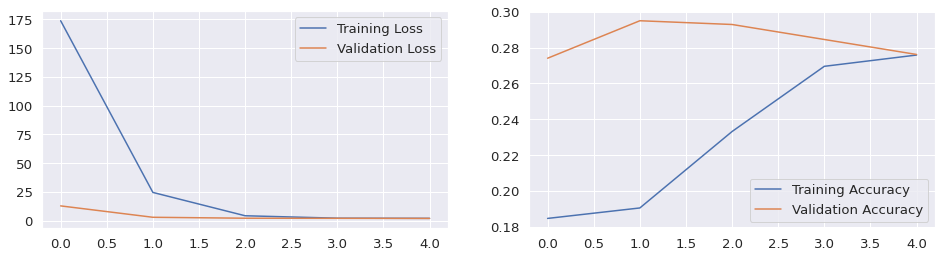

In [148]:
plot_history(history)

In [149]:
pred1= model_count_Bigram.predict(count_2gram_test_ds)
pred1=np.argmax(pred1, axis=1)

15/15 [==============================] - 1s 59ms/step


In [150]:
print_validation_report(test_y, pred1)

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00        78
           6       0.26      0.99      0.42       124
           7       0.20      0.02      0.03       130
           8       1.00      0.01      0.03        70
           9       0.00      0.00      0.00         9

    accuracy                           0.26       477
   macro avg       0.16      0.11      0.05       477
weighted avg       0.27      0.26      0.12       477

Accuracy Score: 0.264
Mean Absolute Error: 1.132
Root Mean Square Error: 1.484
Mean Square Error: 2.201


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


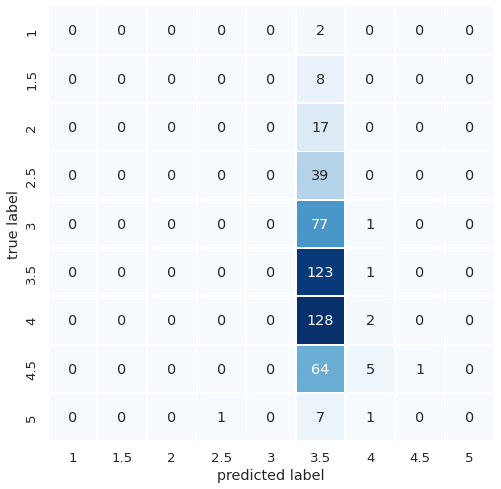

In [151]:
sns.set(font_scale=1.2)
plot_confusion_matrix(test_y,pred1)

# Bigrams with TF-IDF Encoding

## Configuring `TextVectorization` To Return TF-IDF-weighted Outputs

In [152]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=1000,
    output_mode="tf_idf",
)

In [153]:
text_vectorization.adapt(text_only_train_ds)

tfidf_2gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
tfidf_2gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
tfidf_2gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

## Build TF-IDF Bigram Model

In [154]:
def get_model(max_tokens=1000, hidden_dim=128):
    inputs = tf.keras.Input(shape=(max_tokens,))
    x = layers.Dense(hidden_dim, activation="relu")(inputs)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(10, activation="softmax")(x)
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer="adam",
                  loss='SparseCategoricalCrossentropy',
                  metrics=["accuracy"])
    return model

In [155]:
model_tfidf = get_model()
model_tfidf.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_43 (Dense)            (None, 128)               128128    
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dense_44 (Dense)            (None, 10)                1290      
                                                                 
Total params: 129,418
Trainable params: 129,418
Non-trainable params: 0
_________________________________________________________________


In [156]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("tfidf_2gram.keras",save_best_only=True)
   ,tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
]

history = model_tfidf.fit(tfidf_2gram_train_ds.cache(),
          validation_data=tfidf_2gram_val_ds.cache(),
          epochs=20,
          callbacks=callbacks)
model_tfidf = keras.models.load_model("tfidf_2gram.keras")
print(f"Test acc: {model_tfidf.evaluate(tfidf_2gram_test_ds)[1]:.3f}")

Epoch 1/20
70/70 [==============================] - 8s 107ms/step - loss: 158.2374 - accuracy: 0.2210 - val_loss: 33.2647 - val_accuracy: 0.2029
Epoch 2/20
70/70 [==============================] - 0s 3ms/step - loss: 62.1216 - accuracy: 0.2538 - val_loss: 12.7139 - val_accuracy: 0.3536
Epoch 3/20
70/70 [==============================] - 0s 3ms/step - loss: 15.8303 - accuracy: 0.3320 - val_loss: 3.2128 - val_accuracy: 0.3013
Epoch 4/20
70/70 [==============================] - 0s 3ms/step - loss: 2.1605 - accuracy: 0.3226 - val_loss: 1.7167 - val_accuracy: 0.3494
Epoch 5/20
70/70 [==============================] - 0s 3ms/step - loss: 1.8367 - accuracy: 0.3221 - val_loss: 1.6317 - val_accuracy: 0.3766
Epoch 6/20
70/70 [==============================] - 0s 3ms/step - loss: 1.7729 - accuracy: 0.3392 - val_loss: 1.5517 - val_accuracy: 0.3849
Epoch 7/20
70/70 [==============================] - 0s 3ms/step - loss: 1.6876 - accuracy: 0.3805 - val_loss: 1.5318 - val_accuracy: 0.3975
Epoch 8/20
7

In [157]:
model_tfidf.evaluate(tfidf_2gram_test_ds)

15/15 [==============================] - 1s 59ms/step - loss: 1.5062 - accuracy: 0.4172


[1.5061997175216675, 0.4171907901763916]

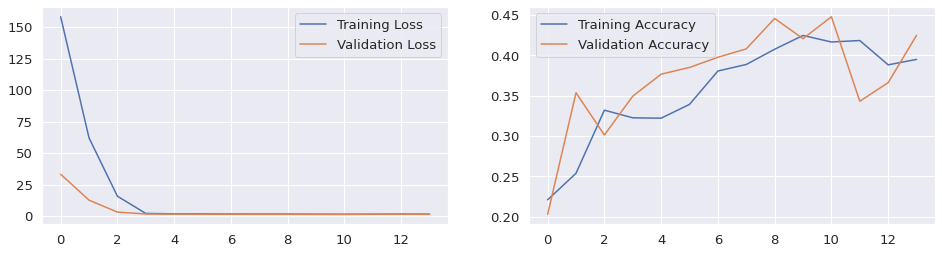

In [158]:
plot_history(history)

In [159]:
pred1= model_tfidf.predict(tfidf_2gram_test_ds)
pred1=np.argmax(pred1, axis=1)

15/15 [==============================] - 1s 59ms/step


In [160]:
print_validation_report(test_y, pred1)

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         8
           3       0.47      0.41      0.44        17
           4       0.55      0.15      0.24        39
           5       0.20      0.13      0.16        78
           6       0.40      0.80      0.53       124
           7       0.48      0.38      0.42       130
           8       0.54      0.40      0.46        70
           9       0.00      0.00      0.00         9

    accuracy                           0.42       477
   macro avg       0.29      0.25      0.25       477
weighted avg       0.41      0.42      0.38       477

Accuracy Score: 0.417
Mean Absolute Error: 0.711
Root Mean Square Error: 1.017
Mean Square Error: 1.034


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


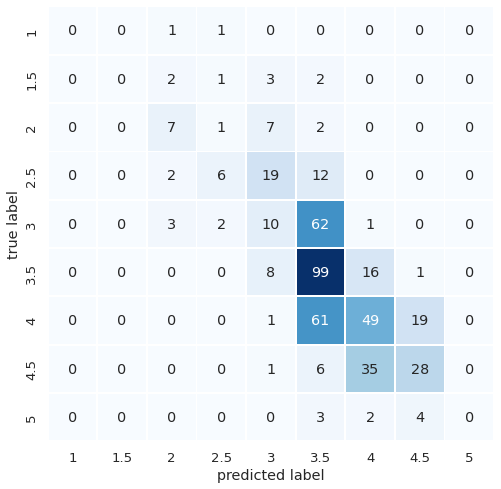

In [161]:
sns.set(font_scale=1.2)
plot_confusion_matrix(test_y,pred1)

## 2 layer model

In [162]:
def get_model(max_tokens=1000, hidden_dim=64):
    inputs = tf.keras.Input(shape=(max_tokens,))
    x = layers.Dense(hidden_dim, activation="relu")(inputs)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(10, activation="softmax")(x)
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer="adam",
                  loss='SparseCategoricalCrossentropy',
                  metrics=["accuracy"])
    return model

In [163]:
model_tfidf = get_model()
model_tfidf.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_45 (Dense)            (None, 64)                64064     
                                                                 
 dropout_26 (Dropout)        (None, 64)                0         
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 dropout_27 (Dropout)        (None, 64)                0         
                                                                 
 dense_47 (Dense)            (None, 10)                650       
                                                                 
Total params: 68,874
Trainable params: 68,874
Non-trainabl

In [164]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("tfidf_2gram.keras",save_best_only=True)
   ,tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
]

history = model_tfidf.fit(tfidf_2gram_train_ds.cache(),
          validation_data=tfidf_2gram_val_ds.cache(),
          epochs=20,
          callbacks=callbacks)
model_tfidf = keras.models.load_model("tfidf_2gram.keras")
print(f"Test acc: {model_tfidf.evaluate(tfidf_2gram_test_ds)[1]:.3f}")

Epoch 1/20
70/70 [==============================] - 6s 84ms/step - loss: 174.5909 - accuracy: 0.1730 - val_loss: 6.2704 - val_accuracy: 0.1715
Epoch 2/20
70/70 [==============================] - 0s 3ms/step - loss: 16.8712 - accuracy: 0.2044 - val_loss: 1.9775 - val_accuracy: 0.1987
Epoch 3/20
70/70 [==============================] - 0s 4ms/step - loss: 7.2762 - accuracy: 0.2363 - val_loss: 1.8451 - val_accuracy: 0.2636
Epoch 4/20
70/70 [==============================] - 0s 3ms/step - loss: 4.4578 - accuracy: 0.2376 - val_loss: 1.8965 - val_accuracy: 0.2908
Epoch 5/20
70/70 [==============================] - 0s 3ms/step - loss: 3.2828 - accuracy: 0.2215 - val_loss: 1.9951 - val_accuracy: 0.2720
Epoch 6/20
70/70 [==============================] - 0s 3ms/step - loss: 2.5323 - accuracy: 0.2372 - val_loss: 1.9300 - val_accuracy: 0.3054
Epoch 7/20
70/70 [==============================] - 0s 3ms/step - loss: 2.0314 - accuracy: 0.2686 - val_loss: 2.0147 - val_accuracy: 0.2657
Epoch 8/20
70/70

In [165]:
model_tfidf.evaluate(tfidf_2gram_test_ds)

15/15 [==============================] - 1s 61ms/step - loss: 1.5767 - accuracy: 0.3438


[1.5767172574996948, 0.34381550550460815]

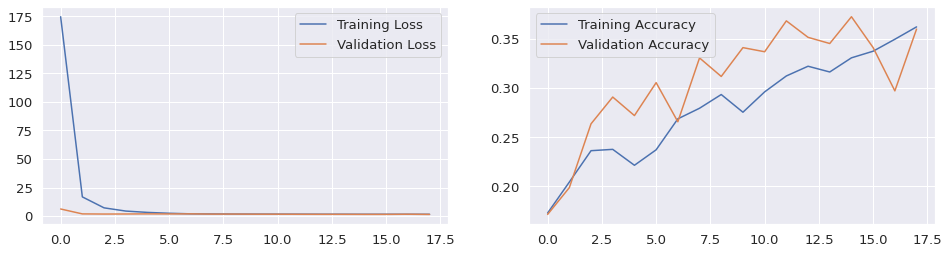

In [166]:
plot_history(history)

In [167]:
pred1= model_tfidf.predict(tfidf_2gram_test_ds)
pred1=np.argmax(pred1, axis=1)

15/15 [==============================] - 1s 59ms/step


In [168]:
print_validation_report(test_y, pred1)

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00        78
           6       0.28      0.60      0.38       124
           7       0.41      0.54      0.47       130
           8       0.45      0.29      0.35        70
           9       0.00      0.00      0.00         9

    accuracy                           0.34       477
   macro avg       0.13      0.16      0.13       477
weighted avg       0.25      0.34      0.28       477

Accuracy Score: 0.344
Mean Absolute Error: 0.920
Root Mean Square Error: 1.299
Mean Square Error: 1.688


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


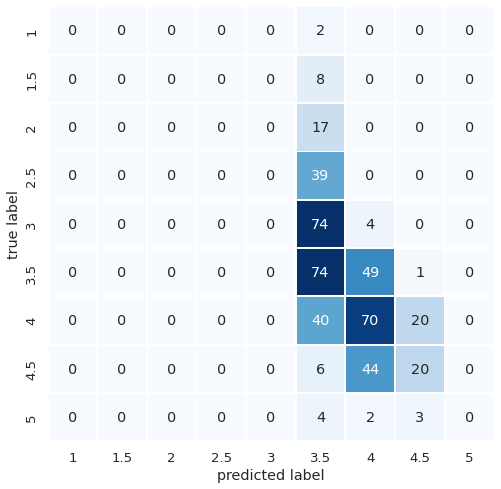

In [169]:
sns.set(font_scale=1.2)
plot_confusion_matrix(test_y,pred1)